<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/RandomForestRegressor_bridging_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [47]:
import pandas as pd
import numpy as np
df = pd.read_excel('electricty_fund_data.xlsx')
df = df.set_index("Date") # define Date  as index
df.shape

(52608, 11)

In [48]:
X=df.iloc[:, 1:11]
y=df.iloc[:, 0]

In [49]:
X_train = X[:-17472]; X_test = X[-17472:]
y_train = y[:-17472]; y_test = y[-17472:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35136, 10), (35136,), (17472, 10), (17472,))

In [50]:
X_train 

,Lignite,Natural Gas,Hard Coal,Nuclear,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,,,,
2014-12-31 23:59:59.991,389.000000,234.685058,188.576064,0.0,40242.250000,8280.00,0.0,21.30,55.17,7.27
2015-01-01 00:59:59.991,389.000000,234.685058,188.576064,0.0,39158.500000,8412.75,0.0,21.30,55.17,7.27
2015-01-01 01:59:59.991,389.000000,234.685058,188.576064,0.0,38824.500000,8502.25,0.0,21.30,55.17,7.27
2015-01-01 02:59:59.991,389.000000,234.685058,188.576064,0.0,38969.250000,8668.50,0.0,21.30,55.17,7.27
2015-01-01 03:59:59.991,389.000000,234.685058,188.576064,0.0,39092.750000,8849.25,0.0,21.30,55.17,7.27
...,...,...,...,...,...,...,...,...,...,...
2019-01-03 18:59:59.983,2213.700662,5099.816981,4246.165676,0.0,61481.958956,11130.50,0.0,22.26,74.00,23.08
2019-01-03 19:59:59.983,2213.700662,5099.816981,4246.165676,0.0,58441.991930,10600.25,0.0,22.26,74.00,23.08
2019-01-03 20:59:59.983,2513.700662,5099.816981,4246.165676,0.0,55837.775503,10068.75,0.0,22.26,74.00,23.08


In [51]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [54]:
features = list(X.columns.values)

In [55]:
rf.feature_importances_

array([0.0176882 , 0.02001233, 0.01686244, 0.01582354, 0.32569492,
       0.14177677, 0.07301498, 0.07721744, 0.05354004, 0.25836934])

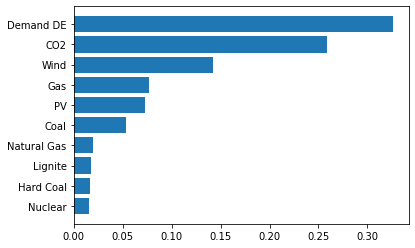

In [56]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [57]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [58]:
selected_features = np.array(features)[rfe.get_support()]

In [59]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])